## load datasets

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [2]:
X_train, X_test = boston.data[:400], boston.data[400:]
y_train, y_test = boston.target[:400], boston.target[400:]

## train xgboost w/ CV

In [3]:
import xgboost as xgb
cls = xgb.XGBRegressor()

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
cls_cv = GridSearchCV(cls, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)

In [6]:
cls_cv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 200], 'max_depth': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [7]:
cls_cv.best_params_

{'max_depth': 4, 'n_estimators': 50}

In [8]:
cls_cv.best_score_

0.69644353131156256

## train xgboost

In [9]:
cls = xgb.XGBRegressor(**cls_cv.best_params_)
cls.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

## evaluate model

In [10]:
from sklearn.metrics import mean_squared_error
pred_train = cls.predict(X_train)
print mean_squared_error(y_train, pred_train)

pred_test = cls.predict(X_test)
print mean_squared_error(y_test, pred_test)

2.05154615469
17.3581721145


In [11]:
import pandas as pd
importances = pd.Series(cls.feature_importances_, index = boston.feature_names)
importances = importances.sort_values()

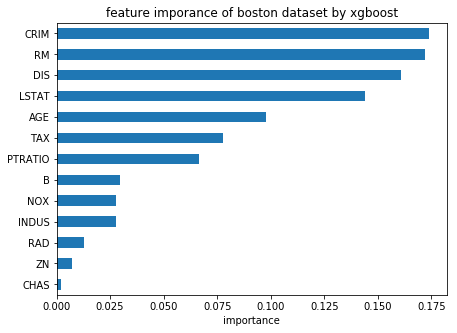

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(7,5))
importances.plot(kind = "barh")
plt.xlabel("importance")
plt.title("feature imporance of boston dataset by xgboost")
fig.savefig("boston_importance.png")